# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [133]:
# Import the appropriate libraries with aliases

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create two new dataframes

north_df = pd.read_csv("/Users/benjaminteter/Desktop/Coding/data-analysis-projects/call-center-cleanup-assignment/NorthCallCenter.csv", index_col=0)
south_df = pd.read_csv("/Users/benjaminteter/Desktop/Coding/data-analysis-projects/call-center-cleanup-assignment/SouthCallCenter.csv",index_col=0)




In [134]:
print(north_df.head())

  Branch     Call Purpose Time Block Incoming or Outgoing Queue Rep ID Sale  \
0  North        Complaint    9:00 AM             Incoming     B  Brent   NO   
1  North    Sales Support   11:00 AM             Incoming     A    Cam   NO   
2  North    Sales Support   11:00 AM             Incoming     B   Todd   NO   
3  North    Sales Support    4:00 PM             Incoming     B  Brent   NO   
4  North  Product Support   12:00 PM             Incoming     B  Brent   NO   

   Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  \
0          0          1             9                  2                 1.0   
1          0          0            11                  1                 1.0   
2          0          0             9                  3                 1.0   
3          0          0            11                  2                 1.0   
4          0          0             8                  2                 1.0   

   During Call Wait Time  Calls  
0         

In [135]:
print(south_df.head().to_string())

  Branch   Call Purpose Time Block Incoming or Outgoing Queue Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls
0  South  Sales Support   10:00 AM             Incoming     D   Kate   NO          0          0             9                  1                 1.0                      2      1
1  South  Sales Support   10:00 AM             Incoming     C   Eric   NO          0          0             8                  2                 1.0                      4      1
2  South  Sales Support   10:00 AM             Incoming     C  Susan   NO          0          0            10                  2                 1.0                      4      1
3  South  Sales Support   10:00 AM             Incoming     C  Alice   NO          0          0            12                  1                 1.0                      3      1
4  South  Sales Support   12:00 PM             Incoming     C  Sandy   NO          0          0          

In [136]:
print(north_df.isna().sum()) # checking for Nulls
print(south_df.isna().sum())

Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [173]:
# EDA Question 1A solution below:

north_df.value_counts(["Rep ID"]).count() #value_counts counts each unique entry's frequency, then .count() gives total count of each entry - 9 reps


np.int64(9)

#### EDA Question 1B:  How many reps are in the South branch?  

In [174]:
# EDA Question 1B solution Below:

south_df.value_counts(["Rep ID"]).count() #11 reps



np.int64(11)

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [175]:
# EDA Question 2A solution Below:


#set variable to = average of x column in north_data frame
north_busy_avg = round(north_df["Busy Minutes"].mean(), 2) #rounding to nearest hundreth
north_not_ready_avg = round(north_df["Not Ready Minutes"].mean(), 2)
north_incoming_wait_avg = round(north_df["Incoming Wait Time"].mean(), 2)
north_during_call_avg = round(north_df["During Call Wait Time"].mean(), 2)

print(north_busy_avg)
print(north_not_ready_avg)
print(north_incoming_wait_avg)
print(north_during_call_avg)


9.99
1.91
3.05
2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [176]:
# EDA Question 2B solution Below:

#same as above, showing south branch stats
south_busy_avg = round(south_df["Busy Minutes"].mean(), 2)
south_not_ready_avg = round(south_df["Not Ready Minutes"].mean(), 2)
south_incoming_wait_avg = round(south_df["Incoming Wait Time"].mean(), 2)
south_during_call_avg = round(south_df["During Call Wait Time"].mean(), 2)

print(south_busy_avg)
print(south_not_ready_avg)
print(south_incoming_wait_avg)
print(south_during_call_avg)


10.05
1.91
3.0
3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [141]:
# EDA Question 3 solution Below:

#get sum of calls per each block of time, combine N and S
#filter per hour block of time, 9 - 5

north_9 = north_df["Calls"][north_df['Time Block'] == "9:00 AM"].sum()  #north_df["Calls"] extracts calls column, [north_df['Time Block'] == "9:00 AM"] checks 9AM rows in Time Block, give sum
south_9 = south_df["Calls"][south_df['Time Block'] == "9:00 AM"].sum() #repeat for south division, 

print("9:00 Calls: ", north_9 + south_9) #adds both division's 9AM calls

#repeat for each hour block of time
north_10 = north_df["Calls"][north_df['Time Block'] == "10:00 AM"].sum()
south_10 = south_df["Calls"][south_df['Time Block'] == "10:00 AM"].sum()

print("10:00 Calls: ", north_10 + south_10)

north_11 = north_df["Calls"][north_df['Time Block'] == "11:00 AM"].sum()
south_11 = south_df["Calls"][south_df['Time Block'] == "11:00 AM"].sum()

print("11:00 Calls: ", north_11 + south_11)

north_12 = north_df["Calls"][north_df['Time Block'] == "12:00 PM"].sum()
south_12 = south_df["Calls"][south_df['Time Block'] == "12:00 PM"].sum()

print("12:00 Calls: ", north_12 + south_12)

north_1 = north_df["Calls"][north_df['Time Block'] == "1:00 PM"].sum()
south_1 = south_df["Calls"][south_df['Time Block'] == "1:00 PM"].sum()

print("1:00 Calls: ", north_1 + south_1)


north_2 = north_df["Calls"][north_df['Time Block'] == "2:00 PM"].sum()
south_2 = south_df["Calls"][south_df['Time Block'] == "2:00 PM"].sum()

print("2:00 Calls: ", north_2 + south_2)

north_3 = north_df["Calls"][north_df['Time Block'] == "3:00 PM"].sum()
south_3 = south_df["Calls"][south_df['Time Block'] == "3:00 PM"].sum()

print("3:00 Calls: ", north_3 + south_3)

north_4 = north_df["Calls"][north_df['Time Block'] == "4:00 PM"].sum()
south_4 = south_df["Calls"][south_df['Time Block'] == "4:00 PM"].sum()

print("4:00 Calls: ", north_4 + south_4)


north_5 = north_df["Calls"][north_df['Time Block'] == "5:00 PM"].sum()
south_5 = south_df["Calls"][south_df['Time Block'] == "5:00 PM"].sum()

print("5:00 Calls: ", north_5 + south_5)

9:00 Calls:  10
10:00 Calls:  99
11:00 Calls:  56
12:00 Calls:  120
1:00 Calls:  40
2:00 Calls:  65
3:00 Calls:  73
4:00 Calls:  53
5:00 Calls:  43


In [142]:
#executes same thing as above code but as a loop, using each 9-5 time block as a variable.
# I understood the above code was very repetative and could have been simplified, but wanted visual step by step representation of how a loop was going to work.

time_blocks = ["9:00 AM", "10:00 AM", "11:00 AM", "12:00 PM", "1:00 PM", "2:00 PM", "3:00 PM", "4:00 PM", "5:00 PM"]

for time_block in time_blocks: #iterates over each time block in time_blocks column
    north_calls = north_df["Calls"][north_df['Time Block'] == time_block].sum() #filter north_df, time_blocks column matches each time_block 9-5 
    south_calls = south_df["Calls"][south_df['Time Block'] == time_block].sum()
    total_calls = north_calls + south_calls
    print(f"{time_block} Calls: {total_calls}") 


# Filters north_df to get rows where time_blocks column matches the current time_block.
# Extracts the 'Calls' column from these rows and calculates the sum of all the matching calls.

9:00 AM Calls: 10
10:00 AM Calls: 99
11:00 AM Calls: 56
12:00 PM Calls: 120
1:00 PM Calls: 40
2:00 PM Calls: 65
3:00 PM Calls: 73
4:00 PM Calls: 53
5:00 PM Calls: 43


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth): 
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:

> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [143]:
north_df.isna()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,False,False,False,False,True,False,False
241,False,False,False,False,False,False,False,False,False,False,False,True,False,False
242,False,False,False,False,False,False,False,False,False,False,False,True,False,False
243,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [144]:
south_df.isna()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,False,False,False,False,False,False,False,False,False,False,False,True,False,False
310,False,False,False,False,False,False,False,False,False,False,False,True,False,False
311,False,False,False,False,False,False,False,False,False,False,False,True,False,False
312,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [145]:
# Question 1 solution below

print(north_df.isna().sum()) 
print(south_df.isna().sum())

Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64


In [146]:
# north_df = north_df.fillna(0)

# north_df = south_df.fillna(0)

#### Record your answer below:

The missing values in this dataframe are all located in the "Incoming Wait Time" column in both dataframes. There are 163 null values in the "Incoming Wait Time" column in the North Branch dataframe (north_df). There are 188 null values in the Incoming Wait Time column in the South Branch dataframe (south_df). Generally, to deal with these missing values, I would use fillna(0) to fill the nulls with 0. However, the missing values in Incoming Wait Time are all associated with outgoing calls, which outgoing calls do not have an incoming wait time. So for this use case, I am leaving the missing values in, as they do not truly effect our queries.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [147]:
# Cleaning Question 2 solution below:

#north_df.head()     #"Sale" column has yes or no values
#north_df["Sale"].unique()     #column's unique values are "NO", "YES", and "YES "

north_df["Sale"] = north_df["Sale"].str.strip() #strips whitespace from "sale" 

north_df["Sale"].unique() #checks unique values again and now we have only "no" and "yes"





array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> The Sale column has unique values: "NO", "YES", and "YES ". The second YES has a trailing space behind the word. This column should just have the binary Yes or No options, to prevent any confusion in the data. To eliminate the duplucate YES, I used .strip() on the Sale column. Now all YES values are the same, without a trailing whitespace. 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [177]:
# Cleaning Question 3 solution below:

import pandas as pd

north_df = pd.read_csv("NorthCallCenter.csv") 
south_df = pd.read_csv("SouthCallCenter.csv")
#re inserting my csv files here because I initially set them up with i index_col=0, which for some reason showed me there were duplicates.

df = pd.concat([north_df, south_df], ignore_index=True)
total_duplicates = df[df.duplicated()]
if not total_duplicates.empty: 
    print("Duplicates:")
    print(total_duplicates)
else:
    print("No duplicates found")


#above function says: when duplicatated() runs, if result is not empty (meaning it found duplicates) print "duplicates:" as well as the actual duplicate themselves.
#Otherwise, if result is empty (no duplicates), print "No duplicates found"



No duplicates found


##### Record your answer below:
> Your Answer: There were no dupicates found.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [149]:
# Cleaning Question 4 solution below:



##### Record your answer below:
I did not find any data to be unnecessary. If there were columns that did not pertain to our business questions and analysis, I would drop the columns.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [178]:
# Create dataframe for the entire company named df

df = pd.concat([north_df, south_df])
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [179]:
# # Manipulation Question solution below:
# rep_id_calls = df.groupby(["Rep ID"]).sum() #Group by rep id, get sum. 
# rep_id_calls.sort_values(by="Calls", axis=0, ascending=False) #sort by calls, decending, to get highest calls by rep id. 

rep_id_calls = df.groupby(["Branch", "Rep ID"])["Calls"].sum() #Group by rep id and branch, get sum of calls.
rep_id_calls = rep_id_calls.sort_values(ascending=False) #sort calls in decending order to show top results

# rep_id_calls = rep_id_calls.reset_index() #convert rep_id_calls back into a dataframe
## before using this function, results were being indexed by branch and rep ID, now its a new dataframe with new index

print(rep_id_calls.head())


Branch  Rep ID
North   Brent     37
South   Eric      35
        Randy     33
        Sandy     32
        Helga     31
Name: Calls, dtype: int64


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [152]:
# Manipulation Question 2 solution below:

#percentage of abandonded calls per branch
#abandoned calls: 1 for yes, 0 for no


abandoned_total = df[df['Abandoned'] == 1].groupby("Branch").size() #counts number of rows where abandoned == 1

total_calls = df.groupby("Branch").size() #counts number of all calls per branch

branch_efficiency_level = (abandoned_total / total_calls) * 100 #turns results into percentage
branch_efficiency_level = round(branch_efficiency_level, 2) #rount to nearest hundreth
print(branch_efficiency_level)


Branch
North    2.86
South    1.27
dtype: float64


In [153]:
#percentage of abandonded calls company wide

company_abandoned_total = df[df['Abandoned'] == 1].shape[0] #filters the rows where the value in the 'Abandoned' column = 1, then .shape[0] counts the number of rows.

company_total_calls = df["Calls"].sum() #sum of calls, across both branches.

efficiency_level = (company_abandoned_total / company_total_calls) * 100 
efficiency_level = round(efficiency_level, 2) #round to nearest hundreth

print(efficiency_level)




1.97


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Yes, South Branch and Company Wide fall out of opitmal range

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [154]:
# # Manipulation Question 3 solution below:
#percent of calls answered within 2 seconds per branch
incoming_calls = df[df['Incoming or Outgoing'] == "Incoming" ] #incoming wait time only applys to incoming calls, filter out outgoing calls

within_2_seconds = incoming_calls[incoming_calls['Incoming Wait Time'] <= 2.0].groupby("Branch").size() # count of calls answered within 2 seconds (<= 2) for each branch (using groupby)
total_incoming_calls = incoming_calls.groupby("Branch").size() # count of incoming calls for each branch, without <2 filtering

service_level = (within_2_seconds / total_incoming_calls) * 100 #service level kpi formula is within_2_seconds divided by total, multiply by 100 for percentage

service_level= round(service_level, 2) # Round to nearest hundreth
service_level

Branch
North    40.24
South    38.10
dtype: float64

In [155]:
#count of calls answered within 2 seconds per branch
count_within_2_seconds = incoming_calls[incoming_calls['Incoming Wait Time'] <= 2.0].groupby("Branch").count()

count_within_2_seconds["Incoming Wait Time"]

Branch
North    33
South    48
Name: Incoming Wait Time, dtype: int64

In [156]:
#company wide percentage

# total number of calls answered within 2 seconds (<= 2)
#.size() returns number of rows, thus counts number of calls for each branch. each row is 1 call.
#sums counts of total calls (both branches) made within 2 seconds
company_within_2_seconds = incoming_calls[incoming_calls['Incoming Wait Time'] <= 2.0].groupby("Branch").size().sum()
company_total_incoming_calls = incoming_calls.groupby("Branch").size().sum() # Total incoming calls summed for all branches, removing <2 seconds filtering.

# Service level KPI formula: results from within_2_seconds divided by total, multiplied by 100 for percentage
company_service_level_percentage = (company_within_2_seconds / company_total_incoming_calls) * 100

company_service_level_percentage = round(company_service_level_percentage,2)
company_service_level_percentage


np.float64(38.94)

In [157]:
#company wide count

company_within_2_seconds = incoming_calls[incoming_calls['Incoming Wait Time'] <= 2.0].count()


company_within_2_seconds["Incoming Wait Time"]

np.int64(81)

##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% with 33 calls
- South Branch = 38.10% with 48 calls
- Company Wide = 38.94% with 81 calls


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [158]:
#sum of all incoming wait times, divide by count
#filter only incoming calls (incoming_calls)
#grouby branch

#total_incoming_calls variable previously definded
#total_incoming_calls = incoming_calls.groupby("Branch").size() # count of incoming calls for each branch, without <2 filtering


sum_call_speed = incoming_calls.groupby("Branch")["Incoming Wait Time"].sum() #sum of all incoming wait times groubed by branch
mean_call_speed = sum_call_speed / total_incoming_calls #sum of incoming wait times divided by total incoming calls

#round to nearest hundreth
mean_call_speed = round(mean_call_speed, 2)
mean_call_speed



Branch
North    3.05
South    3.00
dtype: float64

In [159]:
#same as above, without branch groupby. 


sum_call_speed_company = incoming_calls["Incoming Wait Time"].sum()
mean_call_speed_company = sum_call_speed_company / company_total_incoming_calls

#round to nearest hundreth
mean_call_speed_company = round(mean_call_speed_company, 2)
mean_call_speed_company




np.float64(3.02)

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

/var/folders/8j/lkv619ks11s7t9r0db59kfsm0000gn/T/ipykernel_63038/1765971937.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] *100


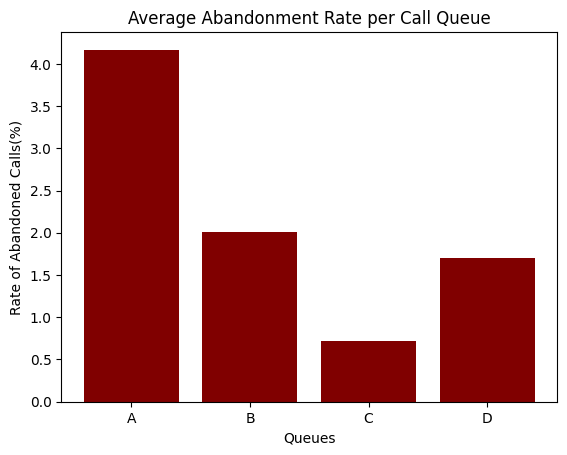

In [180]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.

abandonment_rates = {} #initilize variable as dict
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
     abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] *100 

labels = list(abandonment_rates.keys()) #keys from dict -- x axis
values = list(abandonment_rates.values()) #values from dict -- y axis

plt.bar(labels, values, color ="maroon")

plt.xlabel('Queues')
plt.ylabel('Rate of Abandoned Calls(%)')
plt.title('Average Abandonment Rate per Call Queue')

plt.show()


In [181]:
#check abandonment rates match graph
print(abandonment_rates)

{'A': np.float64(4.166666666666666), 'B': np.float64(2.013422818791946), 'C': np.float64(0.7246376811594203), 'D': np.float64(1.7045454545454544)}


##### Record your answer below:

I chose a bar graph. It lays out the abandonment rate of each queue in a way that lets us compare them to on another.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

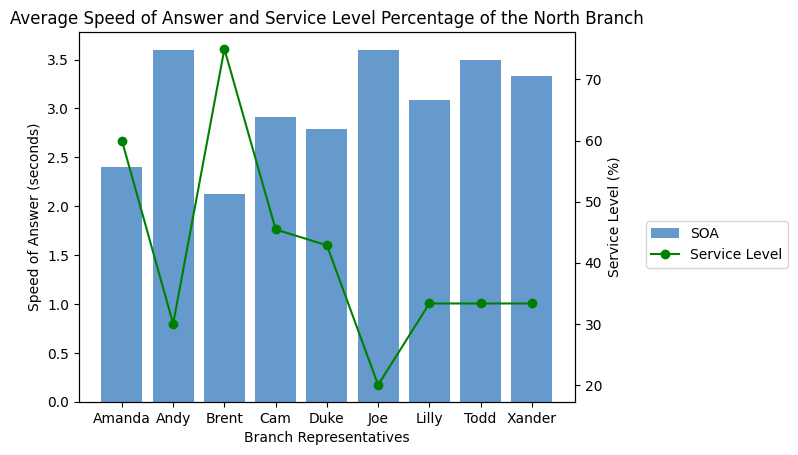

In [182]:
# Create visualization 2 here

# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
# get total incoming calls for each representative

 # Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")
# calls_x = Total Incoming calls less than 2 seconds grouped by Rep - Only calls less than 2s
# calls_y = Total Incoming Calls Only grouped by Rep - All incoming calls
# service_level = both tables combined, matched on data with same rep ID. 

# Create Percentage Column in Table 3

service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
# #Your Code Here:

fig, ax1 = plt.subplots() #creates a subplot to use two different graphs, avg speed of anseswer and service level %
muted_blue = "#6699CC" #sets variable for bar graph's color, using hex code for a muted blue


ax1.bar(north_plt["Rep ID"], north_plt["Incoming Wait Time"], color=muted_blue, label= "SOA") #first axis creates bar chart
#x axis = rep IDs, y axis = avg speed of answers in seconds. Color set to the muted blue hex code. SOA label given for the chart legend
ax1.set_xlabel("Branch Representatives")
ax1.set_ylabel("Speed of Answer (seconds)")
ax1.set_title("Average Speed of Answer and Service Level Percentage of the North Branch")

ax2 = ax1.twinx() #second axis is line chart, creates a second y axis to display service level percentage
ax2.plot(north_plt["Rep ID"], service_level["Service Level %"], color='green', marker='o', label= "Service Level")
ax2.set_ylabel("Service Level (%)")
#x axis is shared from bar chart (rep IDs), y axis = service level %
#marker ='o' adds circles as markers to each data point on the line

fig.legend(loc="upper left", bbox_to_anchor=(1, 0.5)) #creates legend for graph, placing it outside of plot to not overlap. 
plt.show()



In [163]:
#Checking Speed of Answers matches graph
print(north_plt)

   Rep ID  Incoming Wait Time
0  Amanda            2.400000
1    Andy            3.600000
2   Brent            2.125000
3     Cam            2.909091
4    Duke            2.785714
5     Joe            3.600000
6   Lilly            3.083333
7    Todd            3.500000
8  Xander            3.333333


In [164]:
#Checking Service Level % matches graph
print(service_level)

        Calls_x  Calls_y  Service Level %
Rep ID                                   
Amanda        3        5        60.000000
Andy          3       10        30.000000
Brent         6        8        75.000000
Cam           5       11        45.454545
Duke          6       14        42.857143
Joe           2       10        20.000000
Lilly         4       12        33.333333
Todd          2        6        33.333333
Xander        2        6        33.333333


##### Record your answer below:

> Chart style you chose and why: I chose a bar chart to show the Speed of Answers because it is easy to view and compare each representatives averages. For the Service level I chose a line graph because it desplays nicely on top of the bar graph. Since our speed of answers data is measured in seconds, and our service level is measured in percentages, I thought using two different types of graphs would eliminate any confusing. Also, the line graph has markers that show an exact service level percentage, while the line that connects each marker can show us the relationshop and differences between each representative.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

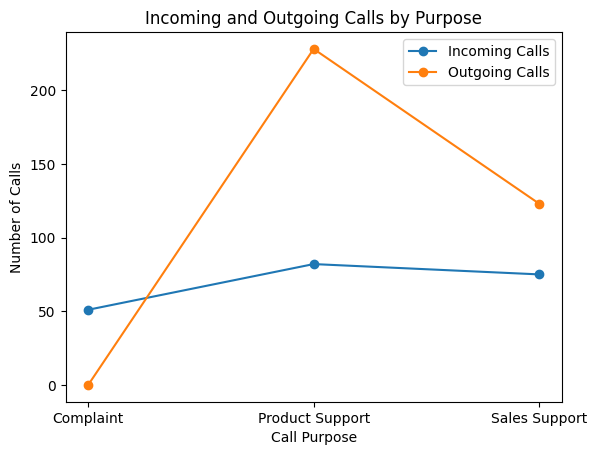

In [184]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need


purpose_group = df.groupby("Call Purpose") #sorting dataframe by call purpose
call_purpose = ["Complaint", "Product Support", "Sales Support"] #lists out each call purpose
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts() #count of each call purpose


complaints = purpose_counts["Complaint"].to_dict() 
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


#Your Code Here:

complaints_incoming = complaints.get("Incoming", 0) #extracts dictionary value which is incoming calls from complaints, defaults zero if there is none
complaints_outgoing = complaints.get("Outgoing", 0)#extracts outgoing calls from complaints dictionary, gives zero if there are none. Complaints have zero outgoing. 

sales_support_incoming = sales_support.get("Incoming", 0) #same as above, but for sales support call puprose incoming / outgoing
sales_support_outgoing = sales_support.get("Outgoing", 0)

product_support_incoming = product_support.get("Incoming", 0) #one more time for product support calls
product_support_outgoing = product_support.get("Outgoing", 0)

incoming_calls = [complaints_incoming, product_support_incoming, sales_support_incoming] #define incoming call so we can make graph show count of incoming calls, per category
outgoing_calls = [complaints_outgoing, product_support_outgoing, sales_support_outgoing] #count of outgoing calls per category

#creating plot
plt.plot(call_purpose, incoming_calls, label='Incoming Calls', marker='o') #each call purpose is x axis, count of incoming calls is y, label is for our legend, then give graph markers
plt.plot(call_purpose, outgoing_calls, label='Outgoing Calls', marker='o') #for our second line, this time for outgoing calls.

#labeling plot
plt.xlabel("Call Purpose")
plt.ylabel("Number of Calls")
plt.title("Incoming and Outgoing Calls by Purpose")
plt.legend()

plt.show()



In [171]:
print(incoming_calls)
print(outgoing_calls)

[51, 82, 75]
[0, 228, 123]


##### Record your answer below:

> Chart style you chose and why: I chose a line graph for this Visualization because it was a simple, clear and unclutter way of viewing our call incoming and outgoing call counts per call purpose. The use of markers show the exact number of calls per category. The use of a line that connects each marker displays and emphasizes the relationship and trends between each call purpose and their call counts. This works especially well for showing each call purpose's differences in the number of incoming and outgoing calls.

In [172]:
#check that counts match graph

print(complaints)
print(sales_support)
print(product_support)

{'Incoming': 51}
{'Outgoing': 123, 'Incoming': 75}
{'Outgoing': 228, 'Incoming': 82}


## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> The south branch is operating more efficiently. Their average abandonment rate is lower than the north branch at 1.27%, compared to the north branch at 2.86%. The lower percentage means a lower count of dropped calls. The south branch also has a faster average speed of answering calls at an average of 3 seconds, compared to the north branch's average speed of 3.05 seconds. The north branch has a higher percentage of calls answered within 2 seconds, north branch with 40.24%, south branch with 38.10%. However, the south branch answered more calls overall, than the north branch did.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> The north branch has 9 representatives and the south branch has 11. According to all our data, the north branch is not running as efficently as the south branch. The north branch would benefit from hiring more representatives.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Additional data that would help in this data analysis would be customer satisfaction. A column in that simply answers a yes or no if the customer's issue was resolved. Another data point could be call duration time. How much time are the reps spending on calls, are they resolving issues in a timely mannor? 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [167]:
# Create your Bonus Mission visualization here!
# call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: